In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [6]:
# Instruction1 Create a PyBer Summary DataFrame

In [7]:
# Get the number of rides by type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [8]:
# Get the driver count by type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [9]:
# Get the total by type
type_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [10]:
# Get the average fare per driver
avg_fare_per_driver = type_total_fares/type_driver_count

In [11]:
# Get the average fare per ride
avg_fare_per_ride = type_total_fares/type_ride_count

In [12]:
# Create summary Data Frame wih above information
PyBer_Summary_DF = pd.DataFrame(
          {"Total Rides": type_ride_count, 
          "Total Drivers": type_driver_count,
          "Total Fares": type_total_fares,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})

In [13]:
#Format the columns
PyBer_Summary_DF["Total Rides"] = PyBer_Summary_DF["Total Rides"].map("{:,.0f}".format)
PyBer_Summary_DF["Total Drivers"] = PyBer_Summary_DF["Total Drivers"].map("{:,.0f}".format)
PyBer_Summary_DF["Total Fares"] = PyBer_Summary_DF["Total Fares"].map("${:,.2f}".format)
PyBer_Summary_DF["Average Fare per Ride"] = PyBer_Summary_DF["Average Fare per Ride"].map("${:,.2f}".format)
PyBer_Summary_DF["Average Fare per Driver"] = PyBer_Summary_DF["Average Fare per Driver"].map("${:,.2f}".format)



In [14]:
# Remove Type from the labels
PyBer_Summary_DF.index.name = None
PyBer_Summary_DF.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
#Instruction2 Create a Multiple-Line Plot for the Sum of the Fares for Each City Type
#Rename columns
#pyber_data_df.index.name = 'City Type'
pyber_data_df=pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, errors="raise")
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#Set the index to the Date column
pyber_data_df.set_index("Date",inplace = True)

In [17]:
#Create a new DataFrame for fares and include only the Date, City Type, and Fare columns using the copy() method on the merged DataFrame.
pyber_data_cp_df = pyber_data_df[["City Type","Fare"]].copy().reset_index(drop=False)

In [18]:
#Set Index to DateTime dataframe
format = '%Y-%m-%d %H:%M:%S'
pyber_data_cp_df['Date'] = pd.to_datetime(pyber_data_cp_df['Date'], format=format)

In [19]:
#Check the DataFrame using the info() method to make sure the index is a datetime data type.
pyber_data_cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
Date         2375 non-null datetime64[ns]
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [20]:
#Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
pyber_date_sum_fare = pyber_data_cp_df.groupby(['City Type','Date']).sum()['Fare']
pyber_date_sum_fare_df = pd.DataFrame(pyber_date_sum_fare)

In [21]:
#Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row.
pyber_data_sum_date_df = pd.pivot_table(pyber_date_sum_fare_df, values='Fare', index=['Date'],
              columns=['City Type'])

In [22]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .
pyber_date_subset_df = pyber_data_sum_date_df.loc["2019-01-01":"2019-04-28"]

In [23]:
#Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.
pyber_date_weekly_subset_df = pyber_date_subset_df.resample('W').sum()

In [24]:
pyber_date_weekly_subset_df 

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


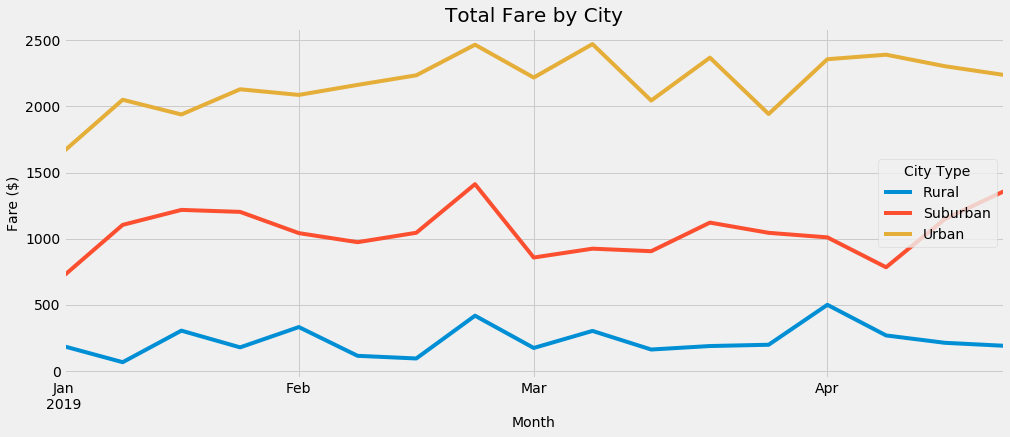

In [25]:
#Using the object-oriented interface method, plot the DataFrame you created 
from matplotlib.pyplot import style
style.use('fivethirtyeight')
lineplot = pyber_date_weekly_subset_df.plot(figsize=(15,6))
plt.title("Total Fare by City", fontsize=20)
plt.ylabel("Fare ($)", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.savefig("analysis/pyBer_Challenge.png")